# Lab 2: Digital Twin
Andrew Phillips

In [2]:
import matplotlib.pyplot as plt

## Prelab

My initial buck converter model is shown in the screenshot below:

![initial_buck_schematic](buck_schematic_1.png)

Determining starting inductance value and peak current:

Given the starting conditions, we can determine that the buck converter is running in discontinuous conduction mode, as the given duty cycle (35%) is below the voltage conversion ratio of 0.444. Given this understanding, we can use the DCM equation included below and rearrange it to solve for the buck's inductance value.

![inductance_deriv](inductance_derivation.jpg)

This equation requires the resistance value of the output load, which can be calculated from the given output voltage and output power values. I calculated the output load resistance to be 5.333 Ohms, and the inductance of the buck converter to be 18uH. From this value, the peak current of the buck converter can be calculated with the equation below to be 3.81A:

![peak_current_calc](peak_current_calc.jpg)

I can then calculate the voltage of buck operating at 50% duty cycle to be 9.55V with the equation below:

![out_v_calc](output_voltage_calc.jpg)

My PLECS model simulated the output voltage at 50% duty cycle to be 9.05V, which is relatively close to my calculated voltage value.

## Lab Questions

### Task 1

1. F_osc = 1.72/(R_rt*C_ct) = 99.34kHz
2. 

![UC2844_output](uc2844_iout.png)

The switching frequency of this screenshot is 50kHz. This makes sense as the calculated oscillator frequency should be double the output frequency.

3. The duty cycle of the output current is 50%. This makes sense as the COMP pin is open, so no comparison is happening to affect the duty cycle. The only waveform that is driving the output current waveform is the T flipflop output, shown in blue in the schematic below.

![IC_schematic](IC_schematic.png)

4. 

Initial buck converter:

![buck_schematic_1](buck_schematic_1.png)

Initial initialization script:

![i_script_1](i_script_1.png)

### Task 2

5. Yes, the output voltage of the buck converter is 10.04V, which closely matches my calculated output voltage of 9.05V.

Output waveforms for the COMP pin voltage source at 2.3V are included below:

![Task_2_Ipk_V_2_3](Task_2_Ipk_V_2_3.png)

One interesting observation from the input current (Am1) is that as the voltage increases at the COMP pin above 2V, the input current initially has a higher peak value before settling to a peak value of 4.333A after several periods, when the output current reaches steady state. This steady state current value is used to create the peak current plot below.

6. 

Text(0.5, 1.0, 'COMP pin voltage vs Measured Peak Current')

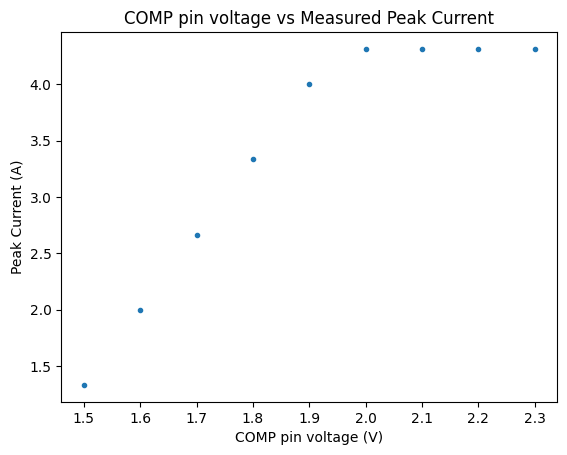

In [3]:
#6
v_comp = [1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3]
Ipk = [1.333,2.000,2.667,3.333,4.000,4.313,4.313,4.313,4.313]

plt.plot(v_comp,Ipk, '.')
plt.xlabel("COMP pin voltage (V)")
plt.ylabel("Peak Current (A)")
plt.title("COMP pin voltage vs Measured Peak Current")

The plot above initially shows a linear relationship between peak current and COMP pin voltage for voltage values between 1.5V and 2.0V. Increasing the voltage beyond 2.0V does not raise the steady state peak current past ~4.313A. This linear relationship stops at 2.0V because of the zener diode in the compensator circuit. 

![comp_block](comparator_block.png)

The voltage going into the COMP pin initially experiences a drop of ~1V from two diodes, then is passed through a resistive divider, giving the compensator in the circuit a voltage of ~(Vcomp-1)/3. Due to the zener diode also connected to this node, when this voltage value exceeds the zener voltage, any excess current is dissipated through the zener, not allowing the voltage at the compensator input to exceed a certain value. This value correlates with 2V being input into the COMP pin, as that is when the linear relationship between COMP pin voltage and peak current breaks down.

7. For voltages between 1.5-2.0V, a linear relationship can be established defined by the equation below, derived by fitting a line of best fit to this portion of the COMP pin voltage vs peak current plot:

Peak Current = 6.6667*COMP pin voltage-8.7

This expression is implemented in hardware by the components in Figure 12 of the UC2844 datasheet. In the current configuration with VCC and RT/CT disconnected, the COMP input is passed through the compensator network, is inverted and compared against the transistor current. The voltage point set at the COMP pin is a reference point, where if the sensed current is greater than the set point, the MOSFET gate voltage is set low, disconnecting the circuit input and output. With this configuration, the voltage set at the COMP pin sets the peak current of the buck converter.

8. The output waveforms from the applied equation are shown below. The above equation has been rearranged to solve for the COMP pin voltage, and the peak current has set to 3.81A (the appropriate current for an 8V output as calculated in the prelab).

![q8_output](Q8_Output.png)

Vm1 is the output voltage trace, which rises to the desired steady state value of 8V, showing that this equation has been correctly implemented.

9. The waveforms below show the source current (Am1), the shunt voltage (Vm2), the output current (Am2), and the output voltage (Vm1).

![q8_output](Q8_Output_1.png)

In the source current trace, we can see the input current being turned on and off as it reaches the peak current set by the voltage at the COMP pin. The current rises linearly, reaches its peak (3.81A), and is then disconnected by the MOSFET opening, driven by the comparison logic.

We can see a similar waveform in the shunt voltage trace, which rises linearly until it is disconnected by the MOSFET, showing the same behavior as the source current trace. The peak value here is not being directly controlled for like the source current, as is instead following Ohm's law.

In the output voltage trace, we can see the waveform oscillating around the desired output voltage of ~8V. This oscillation is being driven by the switching operation of the MOSFET connecting and disconnecting the input source. When the MOSFET is closed and the source current and shunt voltage start increasing, we can see both the output voltage and current waveforms start to rise, and subsequently fall when the MOSFET opens and the source waveforms drop to 0. During this "off" time, the energy stored in the inductor is dumped into the output load to help maintain a steady voltage. The buck's capacitor also helps smooth out this waveform. The output current trace shows the same behavior, following Ohm's law as driven by the desired output voltage.

The waveforms below show the FET drain voltage (Vm3) and the inductor current (Am4).

![q9_output](Q9_inductor_FET.png)

In the inductor current trace, we can see that the converter is operating in discontinuous operation mode, as the inductor's current reaches 0 before the period resets. We can also see that the FET drain voltage drops from 18V to 10V when the inductor is fully charged, as the input only has to supply the output load.

10. 

Final task 2 schematic: 

![task_2_schem](buck_schematic_2.png)

Task 2 initialization script:

![task2iscript](task_2_i_script.png)

### Task 3

Final task 3 schematic:

![task3](task3schematic.png)

11. I am using unknown value #6 for the mystery inductor.

12. I calculated the value of the unknown inductance to be 9.84uH.

13. I calculated this unknown inductance in 2 ways. The first way is dependent on the peak current I am setting the UC2844 to control for, using the equation below:

![peak](peak_current_calc.jpg)

I rearranged this equation for alpha and solved for the buck's inductor value, resulting in a value of 9.84uH.

Another way I calculated this inductance was using the device parameters of the inductor. Using the equation for the voltage across the inductor shown below, I rearranged for the inductance value, approximating the voltage across the inductor as (Vg-V). I used the slope of the input current waveform shown in Q9 (Am1) to approximate a value for dI/dt, resulting in an inductance value of 10.01uH.

![icalc](inductor_calc.jpg)